# Problemas de Aplicación

## El problema del cazador y el mono

Este es un problema clásico de tiro parabólico donde se muestra la independencia del movimiento en el eje $x$ (**MRU**) y en el eje $y$ (**MRUA**). 

Se tiene un mono travieso que escapó del zoologico y que se subió a un arbol. Como éste no se deja atrapar por la cuidadora, ella le apunta directamente con su rifle de dardos sedantes. En el momento en el que ella dispara el dardo, el mono se suelta del arbol, intentado caer al suelo y poder escapar. Se puede mostrar que independiente de la velocidad inicial del dardo, este siempre golpeará al mono, aunque esto se cumple solo si el dardo logra golpear al mono antes de que éste toque el piso.


<center><img src="files/images/dardo-mono2.png"></center>


Las ecuaciones cinemáticas que describen este problema son las siguientes

#### Mono:

$$ x_{mono} = d $$

$$ y_{mono} = d\tan\alpha_0-\frac{1}{2}gt^2\quad    \text{o}    \quad y_{mono} = H_{mono}-\frac{1}{2}gt^2$$


#### Dardo:

$$ x_{dardo} = d + (v_0\cos\alpha_0)t$$

$$ y_{dardo} = (v_0\sin\alpha_0)t-\frac{1}{2}gt^2$$ 


El dardo le dara siempre al mono, en la medida en que se cumpla la siguiente condición:

$$ v_0\sin\alpha_0 \geqslant \sqrt{\frac{H_{mono}g}{2}} $$


Para un valor de $d = 6$ m,  una velocidad inicial v0 y un angulo $\alpha_0$, calcular la posicion en $y$ y el tiempo en el cual el dardo le da al mono. Hacer un grafico




In [2]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Se definen los parámetro iniciales
d = 6.0 # metros
Hmono = 10.0 # metros
alpha = np.arctan(Hmono/d) # radianes
vo = 10.0 # m/s
g = 9.8 # m s^-2

#Se definen las funciones del mono:
def Ymono(t):
    return (Hmono-0.5*g*t**2)

#Se definen las funciones del dardo
def Xdardo(t):
    return (vo*np.cos(alpha)*t)

def Ydardo(t):
    y = (vo*np.sin(alpha))*t-0.5*g*t**2
    return y

tend = 2.0*vo*np.sin(alpha)/g
time = np.arange(0,2.0,0.001)
xdardo = []
ydardo = []
ymono = []


for i in xrange(len(time)):
    xdardo.append(Xdardo(time[i]))
    ydardo.append(Ydardo(time[i]))
    ymono.append(Ymono(time[i]))
    if np.fabs((ymono[i]-ydardo[i])/ymono[i]) <0.001:
        print "\n El dardo le da al mono en: "
        print "="*50
        print "  time    xdardo    ydardo    ymono    error"
        print "="*50
        print "%7.4f  %7.4f  %8.4f %8.4f %8.4f"%(time[i],xdardo[i],ydardo[i],ymono[i],np.fabs((ymono[i]-ydardo[i])/ymono[i]))
        break
    

#
#plt.show()



 El dardo le da al mono en: 
  time    xdardo    ydardo    ymono    error
 1.1660   5.9990    3.3365   3.3382   0.0005


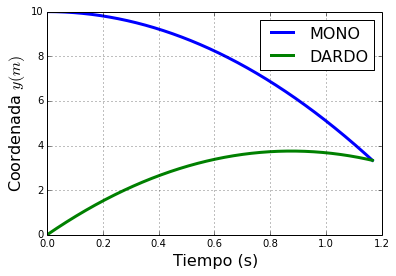

In [8]:
# Grafico ymono vs time, ydardo vs time
plt.plot(time[:len(ymono)],ymono, label = 'MONO',linewidth = 3)
plt.plot(time[:len(ydardo)],ydardo,label='DARDO',linewidth = 3)
plt.xlabel('Tiempo (s)',fontsize=16)
plt.ylabel('Coordenada $y (m)$',fontsize=16)
plt.legend(loc = 'upper right', fontsize = 16)
plt.grid()
#plt.show()

(0, 7)

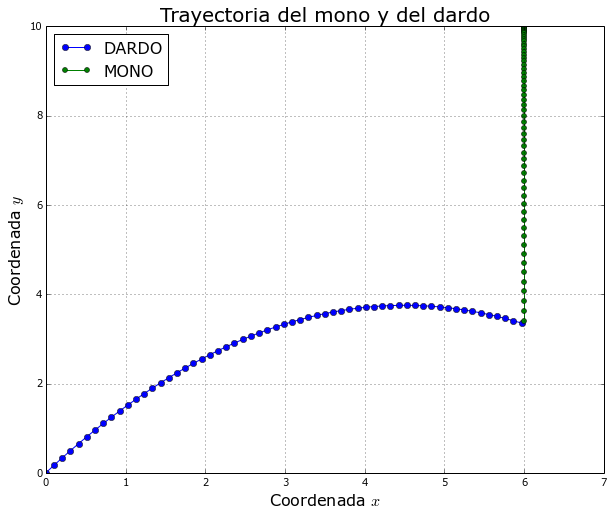

In [4]:
# Grafico xmono vs ymono, xdardo vs ydardo
xmono = np.ones_like(ymono)*d
plt.figure(figsize=(10,8))
plt.plot(xdardo[::20],ydardo[::20],'bo-',label='DARDO') # Se grafica cada 20 puntos
plt.plot(xmono[::20],ymono[::20],'go-',markersize = 5, label = 'MONO') # Se grafica cada 20 puntos
plt.legend(loc = 'upper left', fontsize = 16)
plt.grid()
plt.xlabel('Coordenada $x$',fontsize=16)
plt.ylabel('Coordenada $y$',fontsize=16)
plt.title("Trayectoria del mono y del dardo",fontsize=20)
plt.xlim([0,7])
#plt.show()

## Tercera ley de Kepler

El siguiente archivo muestra el nombre de los planetas, los radios y los periodos orbitales, en metros y segundos, respectivamente.

En este problema vamos a leer el archivo de datos <font color='blue'> 'Datos_planetas.dat' </font> que contiene los datos anteriores, y se va a elaborar una nueva tabla con el nombre de cada planeta,el radio en UA, el periodo con relación al de la Tierra y la razón $R^3/T^2$, para comprobar la tercera ley de Kepler, la cual dice que los cubos de los radios de las órbitas, divididos por los cuadrados de sus períodos, son iguales a una constante. 

Para leer un archivo de datos en python, hay dos formas de hacerlo:
    1. Haciendo uso de funciones basicas de python
    2. Haciendo uso de funciones de NumPy
    
Si se quiere leer/escribir archivos desde python por el método 1, se hace uso de la función `open(args)`. La sitaxis para utilizar esta funcion es:

```python
file_object = open(filename, mode)
```
donde `file_object` es un archivo objeto en el cual se almacena la dirección de memoria en el disco duro (inicialmente en la RAM) donde se va a leer/escribir la información; `filename` es el nombre del archivo con el que se quiere comunicar el programa y `mode` denota lo que se quiere hacer con el archivo: 
   * Leer : **r**
   * Escribir : **w**.  Cada vez que se abra el archivo, se borra lo que existia en él
   * Append: **a** , para ir almacenando información al final del archivo, sin borrar el contenido previo.
   * Leer-escribir simultaneamente : **r+**
   
_Ejemplo: `file = open("archivo.dat","r")` . Se abre el archivo `archivo.dat` para lectura.

**PARA LEER EL ARCHIVO:**  
_Lee el archivo completo_:  
```python
fh = open("hello.txt","r")
fh.read() 
```   
_Lee una linea al tiempo_:
```python
fh = open("hello.txt", "r")
fh.readline()
```  
_Para leer una lista de lineas_:
```python
fh = open("hello.txt", "r")
fh.readlines()
```
**PARA ESCRIBIR EN UN ARCHIVO:**
_Escribir una linea en un archivo_:  
```python
fh = open("hello.txt","w")
fh.write("Hello World")
fh.close()
```   

```python
fh = open("hello.txt", "w")
lines_of_text = ["a line of text", "another line of text", "a third line"]
fh.writelines(lines_of_text)
fh.close()   
```

La funcion `fh.close()` cierra el archivo, para que lo escrito en el pueda ser copiado de la RAM al disco duro. Esto también debe realizarse cuando se abre el archivo para solo lectura, es decir, **es necesario** cerrar el archivo.
  
La otra forma de leer archivos es haciendo uso de la función `numpy.loadtxt()` y para guardar, la funcion `numpy.savetxt()`.

Resolvamos ahora nuestro problema de interes:

#### FORMA 1: con Listas y open()

In [1]:
# Se lee el archivo
file = open("./Datos_planetas.dat","r")


table = []
for linea in file:
    table.append(linea.split())
file.close()

#Definiendo Constantes
UA = float(table[3][1])
Te = float(table[3][2])

In [2]:
# Notese que las entradas de table son strings
table

[['#NOMBRE', 'RADIO_ORBITA(m)', 'PERIODO_ORBITA(s)'],
 ['MERCURIO', '5.9E10', '7.60E6'],
 ['VENUS', '1.08E11', '1.94E7'],
 ['TIERRA', '1.49E11', '3.16E7'],
 ['MARTE', '2.28E11', '5.94E7'],
 ['JUPITER', '7.78E11', '3.74E8'],
 ['SATURNO', '1.43E12', '9.30E8'],
 ['URANO', '2.87E12', '2.66E9'],
 ['NEPTUNO', '4.50E12', '5.20E9'],
 ['PLUTON', '5.91E12', '7.82E9']]

In [3]:
UA

149000000000.0

In [10]:
for i in xrange(1,len(table)):
    n = table[i][0]
    r = float(table[i][1])/UA
    print r

0.395973154362
0.724832214765
1.0
1.53020134228
5.22147651007
9.59731543624
19.2617449664
30.2013422819
39.6644295302


In [14]:
#Archivo de salida
outfile = open("DatosPlanetas1.dat","w")

outfile.write("#NOMBRE    RADIO_ORBITAL(UA) PERIODO_ORBITAL(Tearth)   R^3/T^2\n")

for i in xrange(1,len(table)):
    n = table[i][0]
    r = float(table[i][1])/UA
    t = float(table[i][2])/Te
    k = r**3/t**2
    outfile.write("%-9s  %12.3e %20.3e %18.3e\n"%(n,r,t,k))
    
outfile.close()

In [15]:
!cat DatosPlanetas1.dat

NOMBRE    RADIO_ORBITAL(UA) PERIODO_ORBITAL(Tearth)   R^3/T^2
MERCURIO      3.960e-01            2.405e-01          1.073e+00
VENUS         7.248e-01            6.139e-01          1.010e+00
TIERRA        1.000e+00            1.000e+00          1.000e+00
MARTE         1.530e+00            1.880e+00          1.014e+00
JUPITER       5.221e+00            1.184e+01          1.016e+00
SATURNO       9.597e+00            2.943e+01          1.021e+00
URANO         1.926e+01            8.418e+01          1.009e+00
NEPTUNO       3.020e+01            1.646e+02          1.017e+00
PLUTON        3.966e+01            2.475e+02          1.019e+00


#### FORMA 2 : con NumPy

In [9]:
#Se lee primero la columna de nombres
Nombre = np.loadtxt("Datos_planetas.dat",usecols=[0],dtype="|S10")
Radio, Periodo = np.loadtxt("Datos_planetas.dat",usecols=[1,2],unpack=True)

In [10]:
Nombre

array(['MERCURIO', 'VENUS', 'TIERRA', 'MARTE', 'JUPITER', 'SATURNO',
       'URANO', 'NEPTUNO', 'PLUTON'], 
      dtype='|S10')

In [11]:
UA = Radio[2]
Tearth = Periodo[2]
Radio = Radio/UA
Periodo = Periodo/Tearth

In [12]:
Radio

array([  0.39597315,   0.72483221,   1.        ,   1.53020134,
         5.22147651,   9.59731544,  19.26174497,  30.20134228,  39.66442953])

In [13]:
Kepler = Radio**3/Periodo**2

In [14]:
tabla = np.array([Radio,Periodo,Kepler])

In [15]:
tabla

array([[  3.95973154e-01,   7.24832215e-01,   1.00000000e+00,
          1.53020134e+00,   5.22147651e+00,   9.59731544e+00,
          1.92617450e+01,   3.02013423e+01,   3.96644295e+01],
       [  2.40506329e-01,   6.13924051e-01,   1.00000000e+00,
          1.87974684e+00,   1.18354430e+01,   2.94303797e+01,
          8.41772152e+01,   1.64556962e+02,   2.47468354e+02],
       [  1.07335704e+00,   1.01037634e+00,   1.00000000e+00,
          1.01402114e+00,   1.01627431e+00,   1.02060473e+00,
          1.00855080e+00,   1.01729337e+00,   1.01897680e+00]])

In [16]:
tabla.T

array([[  3.95973154e-01,   2.40506329e-01,   1.07335704e+00],
       [  7.24832215e-01,   6.13924051e-01,   1.01037634e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.53020134e+00,   1.87974684e+00,   1.01402114e+00],
       [  5.22147651e+00,   1.18354430e+01,   1.01627431e+00],
       [  9.59731544e+00,   2.94303797e+01,   1.02060473e+00],
       [  1.92617450e+01,   8.41772152e+01,   1.00855080e+00],
       [  3.02013423e+01,   1.64556962e+02,   1.01729337e+00],
       [  3.96644295e+01,   2.47468354e+02,   1.01897680e+00]])

In [17]:
#Otra forma
TABLA = np.column_stack((Nombre,Radio,Periodo,Kepler))

In [18]:
TABLA

array([['MERCURIO', '0.39597315', '0.24050632', '1.07335704'],
       ['VENUS', '0.72483221', '0.61392405', '1.01037633'],
       ['TIERRA', '1.0', '1.0', '1.0'],
       ['MARTE', '1.53020134', '1.87974683', '1.01402114'],
       ['JUPITER', '5.22147651', '11.8354430', '1.01627430'],
       ['SATURNO', '9.59731543', '29.4303797', '1.02060472'],
       ['URANO', '19.2617449', '84.1772151', '1.00855079'],
       ['NEPTUNO', '30.2013422', '164.556962', '1.01729336'],
       ['PLUTON', '39.6644295', '247.468354', '1.01897680']], 
      dtype='|S10')

In [19]:
np.savetxt("DatosPlanetas2.dat",tabla.T,fmt="%8.3f %18.3f %18.3f",header="RADIO(UA)      PERIODO(Tearth)        T^2/R^3")

In [20]:
!cat DatosPlanetas2.dat

# RADIO(UA)      PERIODO(Tearth)        T^2/R^3
   0.396              0.241              1.073
   0.725              0.614              1.010
   1.000              1.000              1.000
   1.530              1.880              1.014
   5.221             11.835              1.016
   9.597             29.430              1.021
  19.262             84.177              1.009
  30.201            164.557              1.017
  39.664            247.468              1.019


In [21]:
np.savetxt("DatosPlanetas3.dat",TABLA,fmt="%8s %12s %18s %18s",header="NOMBRE    RADIO(UA)      PERIODO(Tearth)        T^2/R^3")

In [22]:
!cat DatosPlanetas3.dat

# NOMBRE    RADIO(UA)      PERIODO(Tearth)        T^2/R^3
MERCURIO   0.39597315         0.24050632         1.07335704
   VENUS   0.72483221         0.61392405         1.01037633
  TIERRA          1.0                1.0                1.0
   MARTE   1.53020134         1.87974683         1.01402114
 JUPITER   5.22147651         11.8354430         1.01627430
 SATURNO   9.59731543         29.4303797         1.02060472
   URANO   19.2617449         84.1772151         1.00855079
 NEPTUNO   30.2013422         164.556962         1.01729336
  PLUTON   39.6644295         247.468354         1.01897680


In [23]:
# Para el caso de variables de distinto numero con numpy.savetxt
a = np.array([1,2,3])
b = np.array(['one', 'two', 'three'])
ab = np.zeros(3, dtype=[('var1',float),('var2','|S5')])
ab['var1'] = a
ab['var2'] = b
np.savetxt('test.txt', ab, fmt="%i %s") 

## Convergencia de una serie

Vamos ahora a corroborar ahora la convergencia de la siguiente serie:

$$\sum_{n=1}^{\infty} \frac{1}{(2n+1)(2n-1)} = \frac{1}{2}$$

In [24]:
Nterms = 50
n = np.arange(1,Nterms)
suma = 0.0
term = 0.0
serie = np.array([])
for i in n:
    term = 1.0/((2*i+1)*(2*i-1))
    suma = suma + term
    serie = np.append(serie,suma)


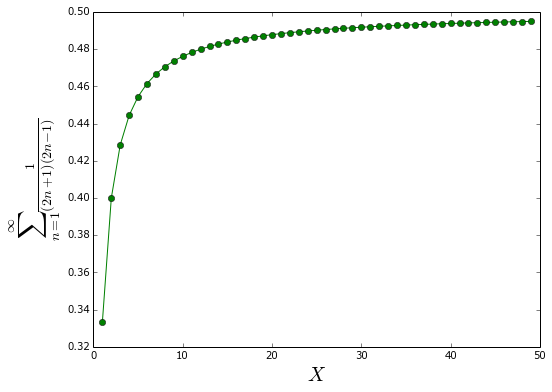

In [25]:
plt.figure(figsize=(8,6))
plt.plot(n,serie,'go-')
plt.xlabel("$X$",fontsize=20)
plt.ylabel("$\sum_{n=1}^{\infty} \\frac{1}{(2n+1)(2n-1)}$",fontsize=20)
#plt.show()

#### PARA HACER EN CLASE
<div class="alert alert-success">
Averigue numéricamente si la serie
$$ \sum_{n=2}^{\infty} \frac{1}{n\ln n}$$
converge o diverge (esto es, si tiende a un limite o si aumenta al añadir más términos a la serie)
</div>

## Series de Taylor: cos(x)

La serie de taylor para la función coseno viene dada por:

$$ \cos x = \sum_{n=0}^{\infty} \frac{(-1)^nx^{2n}}{(2n)!}$$

In [26]:
import math as m
Nterm = 10
def coseno(x):
    suma = 0.0
    for n in xrange(Nterm):
        suma = suma + (-1)**n*x**(2*n)/m.factorial(2*n)
    return suma


In [27]:
coseno(np.pi)

-1.0000000035290801

## Funciones de Bessel

La funcion de Bessel, la cual se encuentra en muchas situaciones de la física, se define por la siguiente serie

$$ J_n(x) = \sum_{s=0}^{ \infty}\frac{(-1)^s}{s!(n+s)!}\left(\frac{x}{2}\right)^{n+2s}$$

donde $n$ es el orden de la funcion de Bessel, con $n=0,1,2,...$

Vamos a graficar las 4 primeras funciones de Bessel.

In [28]:
# Se define una rutina con la funcion de Bessel
def Bessel(n,x,Nterm):
    suma = 0.0
    an = 0.0
    for s in xrange(Nterm):
        an= ((-1.0)**s/(m.factorial(s)*m.factorial(n+s)))*(x/2.0)**(n+2.0*s)
        suma = suma + an
    return suma

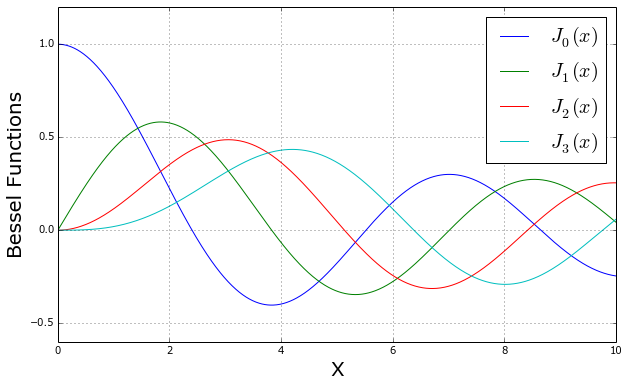

In [29]:
N = 20
dx = 0.01
X = np.arange(0.0,10+dx,dx)

label = ["$J_0(x)$","$J_1(x)$","$J_2(x)$","$J_3(x)$"]
plt.figure(figsize=(10,6))
for n in xrange(4):
    Y = Bessel(n,X,N)
    plt.plot(X,Y,label=label[n])

plt.xlabel("X",fontsize=20)
plt.ylabel("Bessel Functions",fontsize=20)
plt.legend(fontsize=20)
plt.grid()


#### PARA HACER EN CLASE
<div class="alert alert-success">
La función $\cos x$ se puede esprexar en términos de funciones de Bessel, de la siguiente forma:

$$ \cos x = J_0(x) + 2\sum_{n=1}^{\infty}(-1)^n J_{2n}(x)$$  

Haga un gráfico de esta serie y verifique que en realidad representa aproximadamente a la función coseno.  

**NOTA**: Recuerde dar valores de $n$ no muy grandes, puesto que la función factorial puede desbordar la memoria del computador. Tome $n$ hasta 10
</div>

## Series de Fourier

In [30]:
def f(t,Nterm):
    suma=0.0
    if Nterm == 1:
        return (2*np.sin(t))
    else:
        for n in xrange(1,Nterm):
            suma = suma + (-1)**n*np.sin(n*t)/float(n)
        return (-2*suma)

N = 10
T = np.linspace(-np.pi,np.pi,100)
F = np.array(f(T,N))

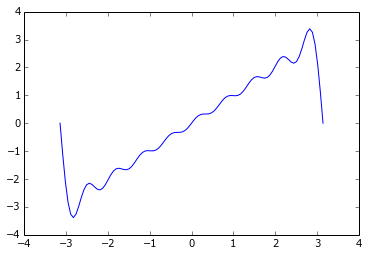

In [31]:
plt.plot(T,F)
#plt.show()

## Curvas de Lissajous

Las curvas de Lissajous son un conjunto de familias paramétricas 2-dimensional normalmente obtenidas cuando se resuelven problemas de sistemas multiarmonicos, como un sistema masa-resortes con dos resortes en cada eje o algun circuito. Las figuras son descritas con las siguientes ecuaciones:

$x(t) = A\sin(a t +\delta)$

$y(t) = B\sin(b t)$

donde $A$ and $B$ son las amplitudes a lo largo de cada eje, $a$ y $b$ las frecuencias angulares y $\delta$ la fase relativa.

In [32]:
#Solutions
def Lissajous( t, A=1.0, B=1.0, a=1.0, b=1.0, delta=0.0 ):
    x = A*np.sin(a*t+delta)
    y = B*np.sin(b*t)
    return x, y

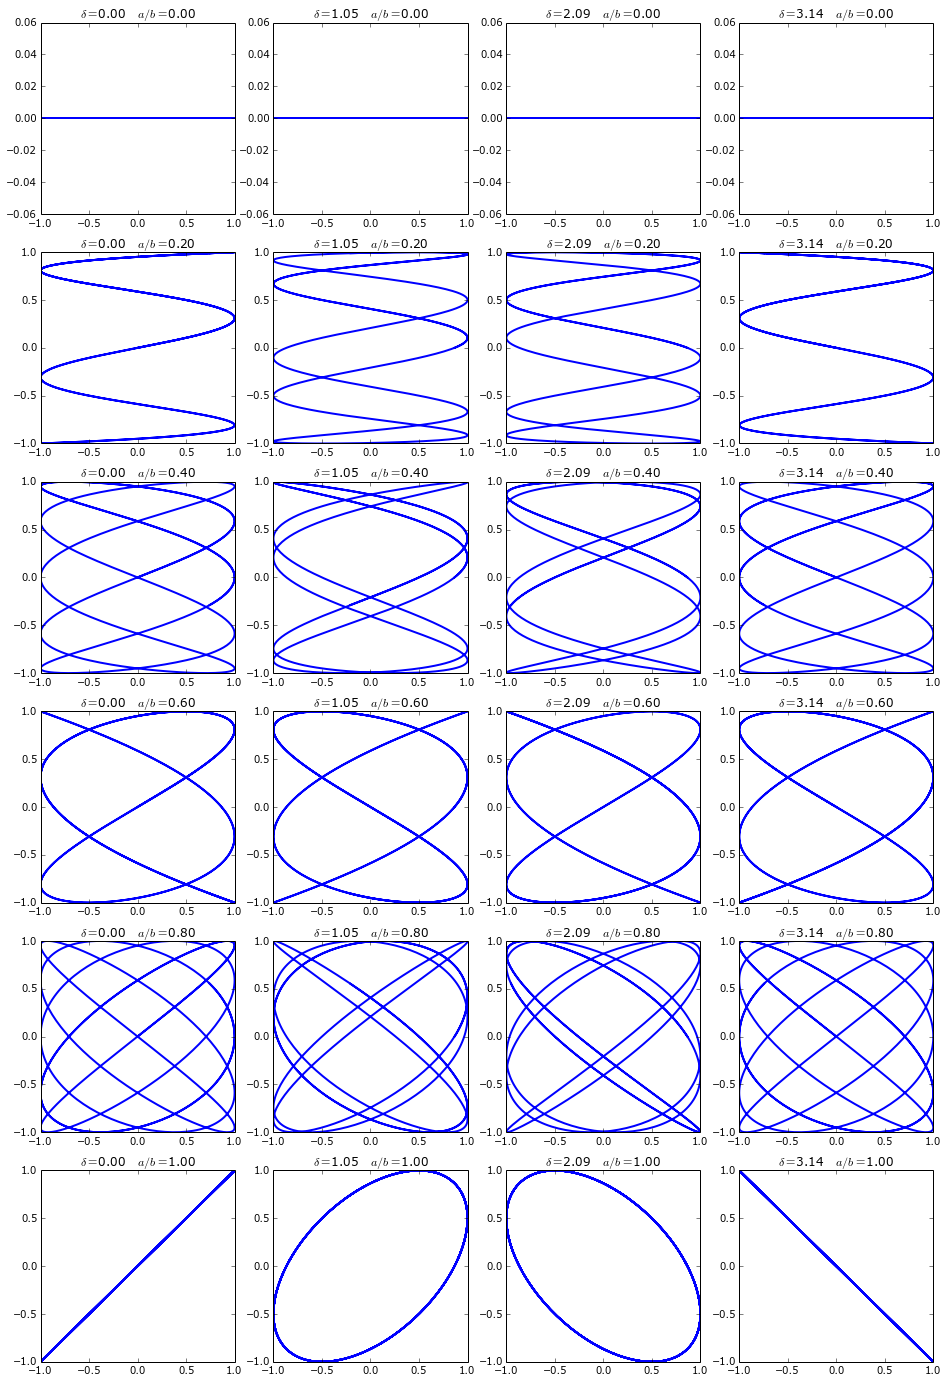

In [33]:
#Parameters to be sampled--------------------
#delta
Ndelta = 4   #Number of delta parameters
Delta = np.linspace(0,np.pi,Ndelta)
#Ratio c=a/b
Nratio = 6  #Number of c parameters
C = np.linspace(0,1,Nratio)
#Time array
T = np.linspace(0,40,1000)

#Initializing plotting environment
plt.figure( figsize=(4*Ndelta, 4*Nratio) )
plt.subplot( Nratio, Ndelta, 1 )
plt.plot()
#Sweeping all figures
for i in xrange( Ndelta ):
    for j in xrange( Nratio ):
        #Creating a subfigure with the current delta and ratio c
        plt.subplot( Nratio, Ndelta, j*Ndelta+i+1 )
        #Plotting this Lissajous curve
        X, Y = Lissajous( T, b=C[j], delta=Delta[i] )
        plt.title( "$\delta=$%1.2f\t$a/b=$%1.2f"%(Delta[i],C[j]) )
        plt.plot( X, Y, linewidth=2 )
#plt.show()

##Ondas Estacionarias

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://es.wikipedia.org/wiki/Onda_estacionaria width=1000 height=350></iframe>')

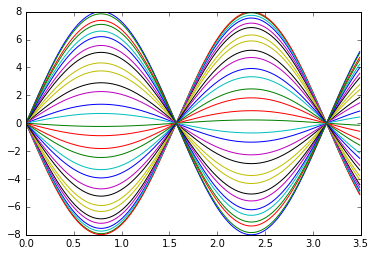

In [19]:
t = np.arange(0,3,0.1)
x= np.arange(0.0,3.5,0.01)
for i in xrange(len(t)):
    y1 = 4*np.sin(2*x-2*t[i])
    y2 = 4*np.sin(2*x+2*t[i])
    y = y1+y2
    #plt.clf()
    plt.plot(x,y)
    plt.ylim([-8,8])
    #plt.savefig('grafico00%d.png'%i)
#plt.show()

## Pulsaciones en el sonido

Una pulsación es la variación periódica en intensidad en un punto dado debido a la superposicion de dos ondas que tienen frecuencias muy cercanas.

Consideremos dos ondas de sonido de igual amplitu con frecuencias $f_1$ y $f_2$. Tomando la funcion de onda de cada una de ellas en $x=0#, podemos ver su evolución temporal:

$$y_1 = A\cos(\omega_1 t) = A\cos 2\pi f_1t$$
$$y_2 = A\cos(\omega_2 t) = A\cos 2\pi f_2t$$

Usando el principio de superposicion:

$$y=y_1+y_2 = A(\cos 2\pi f_1t + \cos 2\pi f_2t) = \left[2A\cos 2\pi\left(\frac{f_1-f_2}{2}\right)t\right]\cos 2\pi\left(\frac{f_1+f_2}{2}\right)t $$

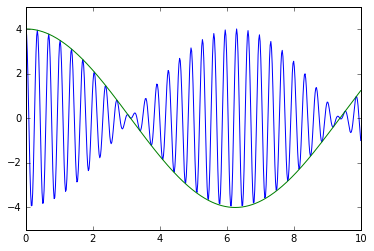

In [23]:
t =np.linspace(0,10,500)
A1 = 2.0
A2 = 2.0
f1 = 52.92
f2 = 52.76
y1 = A1*np.cos(2*np.pi*f1*t)
y2 = A2*np.cos(2*np.pi*f2*t)
Y = y1+ y2
envolvente = 2*A1*np.cos(2*np.pi*0.5*(f1-f2)*t)
#envolvente1 = -2*A1*np.cos(2*np.pi*0.5*(f1-f2)*t)
plt.plot(t,Y)
plt.plot(t,envolvente,'g',linewidth = 1)
#plt.plot(t,envolvente1,'g',linewidth = 1)
plt.ylim([-5,5])
plt.show()

## Ejercicio

Un cuerpo de $1$ kg de masa se lanza hacia arriba desde una altura de $50$ m  y con una velocidad inicial de  $30$ m/s,en un lugar donde la aceleración de la gravedad es de $9.8\;m/s^2$. Utilice las formulas generales para la caída libre:

 \begin{equation}
  y=y_o+v_ot-\frac{1}{2}gt^2;\qquad v=v_o-gt
 \end{equation}
 

para escribir un programa en python que muestre el tiempo de caida y la velocidad final de la particula cuanto llega al piso. Además, haga uso de las fórmulas para la energía cinética ($E_c$) y la energía potencial ($E_p$):
 
>\begin{equation}
E_c=\frac{1}{2}mv^2;\qquad E_p=mgy
\end{equation}

para escribir un programa en python en donde se calcule la posicion, velocidad, energia cinetica, energia potencial y energia total de la particula antes de llegar al piso. Hacer los graficos de energía cinetica, energia potencial y energia total.